# The Adjacency Graphs Project
This is a demonstration on how to use the **algorithms**, **plots** and **exporting** functionality in the Adjacency Graphs project. The package has been designed to make is easy for a python user to create, explore and modify graph objects that have been built from shape files. We have also *strongly encouraged* an architecture which will make it easy for new algorithms and methods to be included so that they're always easy for users to find. Let's get started

## Loading in a shapefile
The package needs exactly three pieces of input from the user to get started. We need to know the place you've stored your `.shp` file, the column of your shapefile to use to build a graph and the name of the algorithm you'd like to use. Here, we will use the included `TwoStepGraph` algorithm on example data in the testing directory.

In [1]:
# Any included algorithm can be imported like this
from adjacency_graphs.algorithms import TwoStepGraph

my_graph = TwoStepGraph(shp_path='../tests/shapefiles/testershape.shp', id_column='id')

At this point, the results don't look so impressive. However, *most* of the magic has already happened by the way that we set up the project. We can now move around and use `my_graph` as a complete graph object. All of the useful information is already in there. To demonstrate the point, let's see what `my_graph` looks like using a built-in plotting function.

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


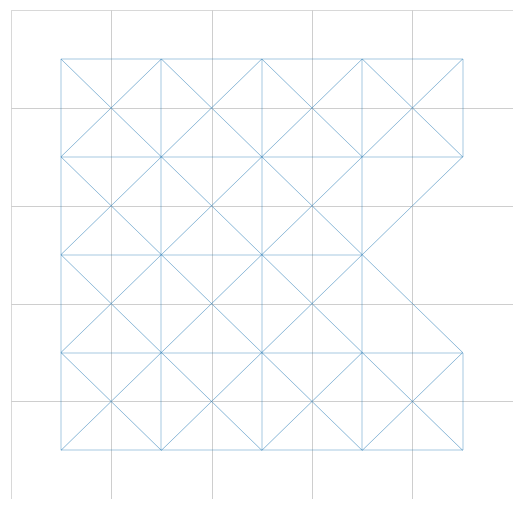

In [2]:
%matplotlib inline  

# Here is how you import a plotting function
from adjacency_graphs.plots.mpl import visualize_adjacency_graph

# Make a matplotlib figure
fig = visualize_adjacency_graph(my_graph)

# Show that figure
fig.show()

All of the data necessary to make that plot was packed away in the `my_graph` object. Now, suppose that we're not really happy with the graph we created. The Adjacency Graphs Project library gives methods with which to modify the data.

## Modifying Graphs
There are at most two ways we can change a graph: we can change the vertices or we can change the edges. In this example, there is a purposefully droped vertex in the shapefile in position 14. The `TwoStep` algorithm could not possibly have made any edges, because the region associated to 14 didn't exist. Let's add it back in. 

In [3]:
# TODO add_vertex and fix this example
# TODO need to add pysal object matching the added vertex
import pandas as pd
data = pd.DataFrame({'CENTROID_XCOORDINATES': .75, 'CENTROID_YCOORDINATES': -.25, 'id': 14}, index=[14])
my_graph.shape_df = my_graph.shape_df.append(data)


Adding a vertex takes additional data, since you must also provide the location of that vertex and any additional data that you'd like stored with that point. In contrast, it is very simple to add edges since you only need to provide which two points you need to connect in any order. We fill in the missing lines here and plot

In [4]:
my_graph.add_edge((14, 8))
my_graph.add_edge((14, 9))
my_graph.add_edge((14, 13))
my_graph.add_edge((14, 18))
my_graph.add_edge((14, 19))

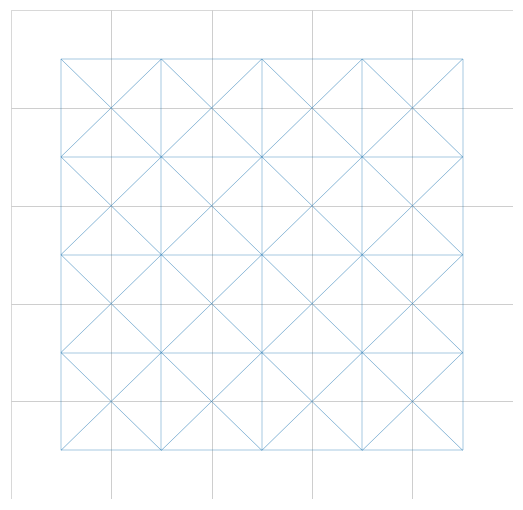

In [5]:
# TODO This is dependent on the pysal fix above
fig = visualize_adjacency_graph(my_graph)
fig.show()

## Exporting
Now that our graph looks the way we would like, we can export it for other people to use. All of the vertex information and edge information, including what we have modified above, is written into the columns. Here, we write a csv to the `notebook_demo_graph.csv` file in this directory.

In [6]:
my_graph.export_graph('notebook_demo_graph.csv')

# Conclusion
That concludes this demo. If there's additional functionality you'd like to see added to this library, you can [open an issue](https://github.com/msarahan/state-adjacency-graphs/issues) with the hopes that it will be implemented or [contribute](https://github.com/msarahan/state-adjacency-graphs/blob/master/docs/development_guide.md) it yourself!

While you can download this file and run any part of it yourself, we've added a couple additional cells with neat functionality.

In [7]:
# Here's what that the first five lines of that file look like
pd.read_csv('notebook_demo_graph.csv').head(5)

,Unnamed: 0,CENTROID_XCOORDINATES,CENTROID_YCOORDINATES,id,vertices
0,0,-1.25,0.75,0,"set([0, 1, 5, 6])"
1,1,-0.75,0.75,1,"set([0, 1, 2, 5, 6, 7])"
2,2,-0.25,0.75,2,"set([1, 2, 3, 6, 7, 8])"
3,3,0.25,0.75,3,"set([2, 3, 4, 7, 8, 9])"
4,4,0.75,0.75,4,"set([8, 9, 3, 4])"


In [9]:
# See attributes and methods of my_graph at the end of the list
print(dir(my_graph))

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_edge', 'drop_edge', 'export_graph', 'id_column', 'loaded_geodata', 'loaded_polymap', 'neighbors', 'shape_df', 'shp_path']
